In [16]:
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
from IPython import display

from utils import get_spectrogram

seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

data_dir = "./data/"

# Train-validation split
train_ds, val_ds = tf.keras.utils.audio_dataset_from_directory(
    directory=data_dir,
    batch_size=64,
    validation_split=0.2,
    seed=0,
    output_sequence_length=16000,
    subset="both",
)

label_names = np.array(train_ds.class_names)

Found 64727 files belonging to 31 classes.
Using 51782 files for training.
Using 12945 files for validation.


In [17]:
model_dir = "./models/model_best_1.h5"
model = tf.keras.saving.load_model(model_dir)

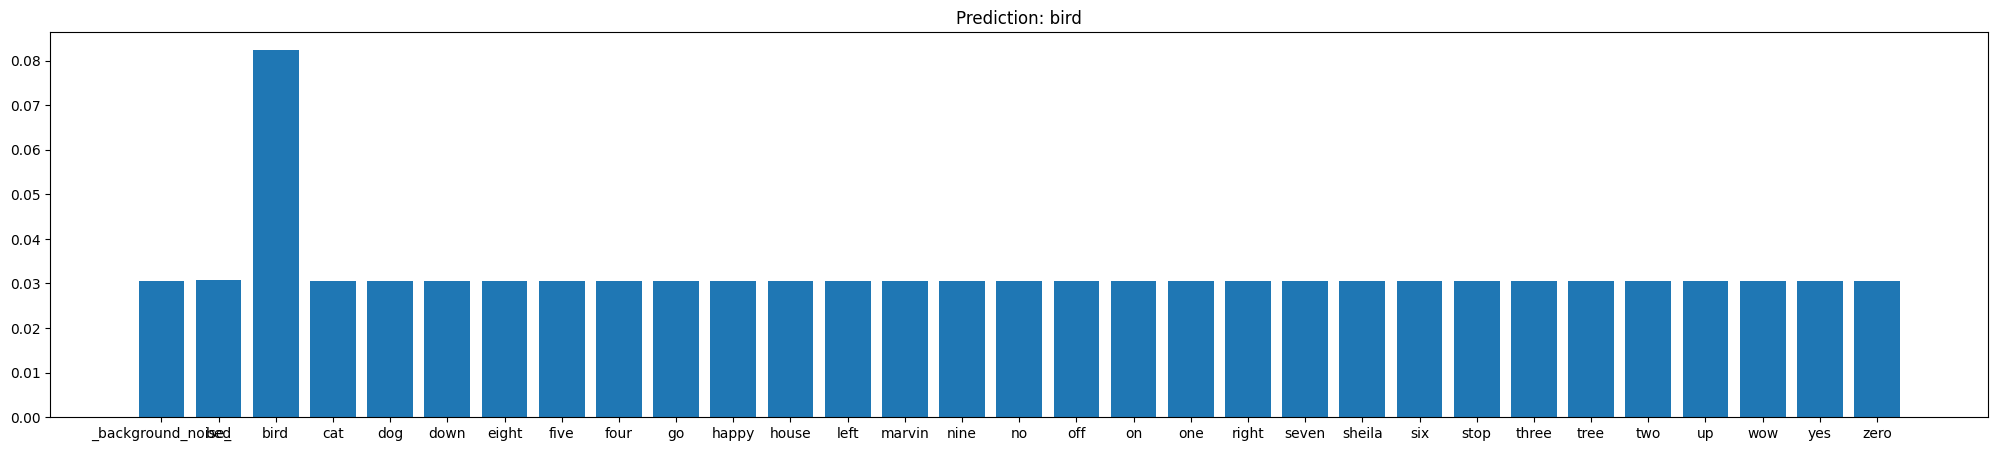

In [18]:
x = "data/bird/00f0204f_nohash_2.wav"
x = tf.io.read_file(str(x))
x, sample_rate = tf.audio.decode_wav(x, desired_channels=1, desired_samples=16000,)
x = tf.squeeze(x, axis=-1)
waveform = x
x = get_spectrogram(x)
x = x[tf.newaxis,...]

probabilities = tf.nn.softmax(prediction[0])
predicted_index = tf.argmax(probabilities)
predicted_label = x_labels[predicted_index]

plt.figure(figsize=(25,5))
prediction = model(x)
plt.bar(label_names, probabilities)
plt.title(f'Prediction: {predicted_label}')
plt.show()

display.display(display.Audio(waveform, rate=16000))